# Neural network for image classification

## Approach 1 - extract all the pixels

### Importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.17.1'

### Extracting pixels from images(모든 이미지에서 픽셀 추출)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Computer Vision/Datasets/homer_bart_1.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [4]:
directory = '/content/homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)
# .DS_Store -> 구글 드라이브에 파일 업로드 시 생긴 임시 파일. 사용하지 않으므로 신경X

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [5]:
type(files)

list

In [6]:
height, width = 128, 128

In [7]:
images = []  # 모든 이미지의 픽셀을 저장
classes = [] # Homer인지 Bart인지..

In [8]:
for image_path in files:
    #print(image_path)
    try: # 처음에 있는 .DS_Store는 이미지가 아니므로 오류가 남. 그래서 예외 처리를 했음.
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2]  # 색상(채널)을 제외한 높이와 너비만 추출.
    except:
        continue

    image = cv2.resize(image, (width, height))  # 모든 이미지의 크기를 맞춤.

    # 신경망에 이미지를 넣을 때, 주로 흑백 이미지로 변환함. R, G, B 채널의 값이 모두 같음(회색). -> 모든 채널을 사용할 필요 없음.
    # -> 신경망의 입력층을 줄일 수 있음.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    cv2_imshow(image)

    image = image.ravel() # 신경망의 입력층에 넣기 위해 행렬을 벡터로 변환
    print(image.shape)

    images.append(image)

    image_name = os.path.basename(os.path.normpath(image_path)) # 이미지의 이름만 추출하는 함수. ex) bart1
    if image_name.startswith('b'):
       class_name = 0
    else:
        class_name = 1

    classes.append(class_name)
    print(class_name)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
images  # 255는 흰색.

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 128, 123, 124], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([254, 254, 254, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 2

In [10]:
print(classes)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
type(images), type(classes)

(list, list)

In [12]:
# 신경망의 입력 형식은 numpy 배열
X = np.asarray(images)
y = np.asarray(classes)

In [13]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [14]:
X.shape  # 128 * 128

(269, 16384)

In [15]:
y.shape

(269,)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

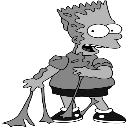

In [17]:
cv2_imshow(X[0].reshape(width,height)) # 현재 X[0]는 벡터. 그러나 이미지는 행렬의 표현법..

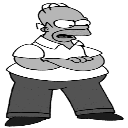

In [18]:
cv2_imshow(X[200].reshape(width,height))

<Axes: ylabel='count'>

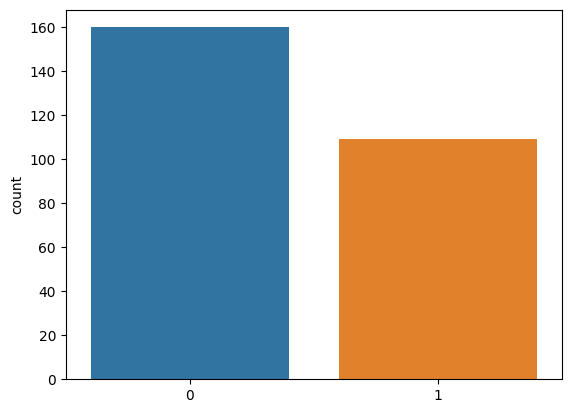

In [19]:
sns.countplot(x=y, hue=y, palette=["#1f77b4", "#ff7f0e"], legend=False)

In [20]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

### Normalizing the data

In [21]:
X[0].max(),X[0].min()  # 255는 흰색, 0은 검정색
# 255는 최댓값. 신경망에 넣을 시 데이터 처리시간이 오래걸릴 수 있음(행렬 곱셈이 많기 때문).
# 0과 1 범위로 정규화해야 처리 속도가 빨라짐
# 또한 큰 값을 넣으면 결과가 좋지 못함.

(255, 0)

In [22]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 X = scaler.fit_transform(X)

In [23]:
X[0].max(),X[0].min()

(1.0000000000000002, 0.0)

In [24]:
X[1]

array([0.9947644 , 0.99479167, 0.99479167, ..., 0.99559471, 0.99595142,
       0.9950495 ])

### Train and test set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
X_train.shape, y_train.shape

((215, 16384), (215,))

In [28]:
X_test.shape, y_test.shape

((54, 16384), (54,))

### Building and training the neural network

In [29]:
(16384 + 2) / 2  # 은닉층 뉴런 개수

8193.0

In [30]:
# 16384 -> 8193  -> 8193
network1 = tf.keras.models.Sequential()  # 신경망 선언 클래스.
network1.add(tf.keras.layers.Dense(input_shape=(16384,), units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=8193, activation='relu'))
network1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
network1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
network1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
# 옵티마이저 -> 가중치를 업데이트하거나 조정할 때 사용하는 알고리즘.

In [33]:
history = network1.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 347ms/step - accuracy: 0.4705 - loss: 192.3966
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5166 - loss: 7.6068
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5284 - loss: 9.6899
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5638 - loss: 4.1460
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5614 - loss: 1.4357
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6135 - loss: 0.6603
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4199 - loss: 0.7215
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6376 - loss: 0.6426
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6026 - loss: 0.6601
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6632 - loss: 0.6298
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7406 - loss: 0.6099
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6828 - loss: 0.621

### Evaluating the neural network

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

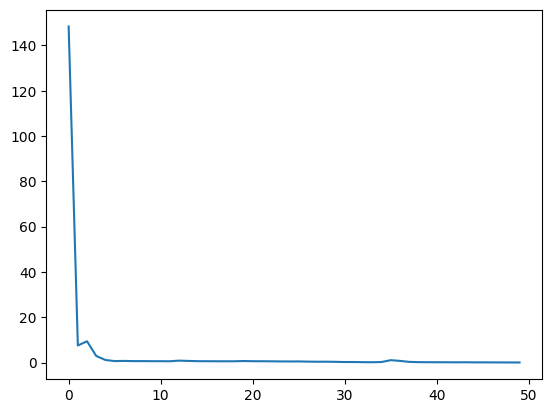

In [35]:
plt.plot(history.history['loss']);
# 이 그래프를 보고 신경망의 에포크를 몇회 실행할 지 알 수 있음.

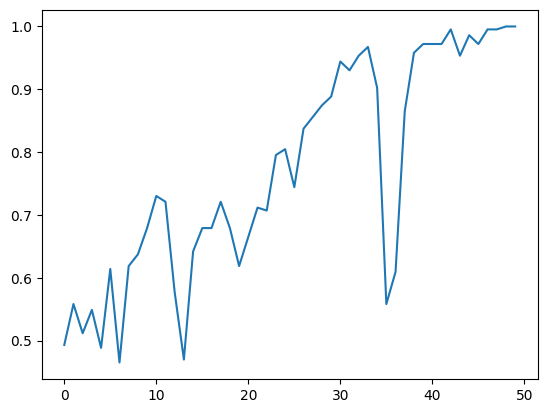

In [36]:
plt.plot(history.history['accuracy']);

In [37]:
X_test.shape

(54, 16384)

In [38]:
predictions = network1.predict(X_test)
predictions # 출력층의 활성화 함수가 시그모이드 -> 확률값을 반환.

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


array([[0.03163627],
       [0.91696656],
       [0.01881675],
       [0.09654569],
       [0.79628277],
       [0.06083728],
       [0.91572404],
       [0.89032537],
       [0.5777441 ],
       [0.91696656],
       [0.09051956],
       [0.91696656],
       [0.91245085],
       [0.69047004],
       [0.15596654],
       [0.03362   ],
       [0.29056776],
       [0.6497953 ],
       [0.11984119],
       [0.0132445 ],
       [0.00323897],
       [0.837588  ],
       [0.02070304],
       [0.32173133],
       [0.05334711],
       [0.829309  ],
       [0.01460145],
       [0.01077317],
       [0.26916924],
       [0.91696656],
       [0.58997166],
       [0.914854  ],
       [0.8629671 ],
       [0.00674514],
       [0.9168913 ],
       [0.03438127],
       [0.67197585],
       [0.01746362],
       [0.26092547],
       [0.01811572],
       [0.91696656],
       [0.84761333],
       [0.14725097],
       [0.0222718 ],
       [0.02682837],
       [0.5421233 ],
       [0.91696656],
       [0.055

In [39]:
# 0: False -> Bart
# 1: True  -> Homer

In [40]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [41]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7407407407407407

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[21,  7],
       [ 7, 19]])

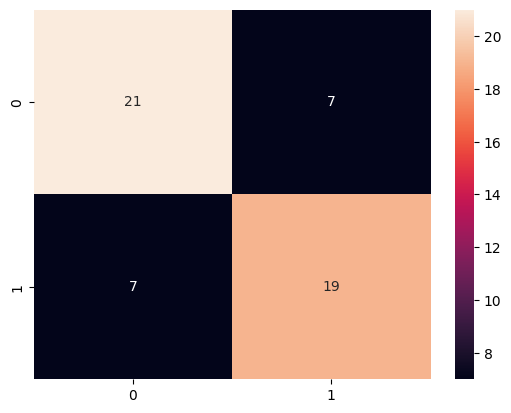

In [44]:
sns.heatmap(cm, annot=True);

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.73      0.73      0.73        26

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



### Saving and loading the network

In [46]:
# 신경망 모델 저장
model_json = network1.to_json() # 인터넷에서 아주 일반적인 형식. 신경망 구조를 나타낼 때도 사용.
with open('network1.json', 'w') as json_file:
    json_file.write(model_json)

In [47]:
# 가중치 저장
from keras.models import save_model
network1_saved = save_model(network1, 'weight1.hdf5') # .hdf5 -> 텐서플로로 가중치 저장 시 사용하는 파일 유형

In [48]:
with open('network1.json') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 16384], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 8193, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constra

In [49]:
# # 신경망 모델, 가중치 파일 로드
network1_loaded = tf.keras.models.model_from_json(json_saved_model)
network1_loaded.load_weights('/content/weight1.hdf5')
network1_loaded.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
network1_loaded.summary()
# 이 출력으로 신경망 구조를 볼 수 있으면 해당 객체가 성공적으로 로드되었음을 뜻함.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8193)                │     134,242,305 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8193)                │      67,133,442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           8,194 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,383,941 (768.22 MB)

 Trainable params: 201,383,941 (768.22 MB)

 Non-trainable params: 0 (0.00 B)

### Classifying one single image

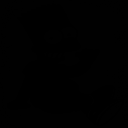

In [51]:
test_image = X_test[0]
cv2_imshow(test_image.reshape(width, height))
# 정규화 처리되었으므로 이미지가 검정색으로 보임.

In [52]:
test_image

array([1., 1., 1., ..., 1., 1., 1.])

In [53]:
network1_loaded.predict(test_image.reshape(1,-1))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


array([0.03163585], dtype=float32)

In [54]:
if network1_loaded.predict(test_image.reshape(1,-1))[0] < 0.5:
    print('Bart')
else:
    print('Homer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Bart


In [55]:
test_image = X_test[0]
test_image = scaler.inverse_transform(test_image.reshape(1, -1))
test_image

array([[255., 255., 255., ..., 255., 255., 255.]])

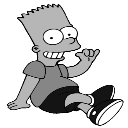

In [56]:
cv2_imshow(test_image.reshape(width, height))

## Approach 2 - feature extraction

### Feature extractor

In [57]:
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [58]:
# 특성들을 파일의 헤더로 만들기
export = 'mouth,pants,shoes,tshirt,shorts,sneakers,class\n'

In [59]:
show_images = False # 다음 셀의 코드 실행 시 이미지를 출력하려면 True로 설정해야 함.
features = []

In [60]:
for image_path in files:
    #print(image_path)
    try:
        original_image = cv2.imread(image_path)
        (H, W) = original_image.shape[:2]  # :2 -> 세번째는 채널의 개수(필요없음)..
    except:
        continue

    image = original_image.copy()
    image_features = []  # 각 이미지의 특성을 저장.
    mouth = pants = shoes = 0  # Homer 특성에 관한 변수를 초기화
    tshirt = shorts = sneakers = 0  # Bart 특성에 관한 변수를 초기화

    image_name = os.path.basename(os.path.normpath(image_path)) # 각 이미지 이름 추출

    if image_name.startswith('b'):
        class_name = 0
    else:
        class_name = 1

    for height in range(0, H):  # 이미지의 각 행에 접근
        for width in range(0, W):   # 이미지의 각 열에 접근
            blue = image.item(height, width, 0) # OpenCV에서는 채널의 순서가 역순.  각 픽셀의 색을 얻음.
            green = image.item(height, width, 1)
            red = image.item(height, width, 2)

            # Homer - brown mouth
            if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 200): # 갈색 계열
                image[height, width] = [0, 255, 255] # 노란색(그저 특징을 잘 포착했는지 확인하기 위해 색을 바꾸는 것)
                mouth += 1

            # Homer - blue pants
            if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
                image[height, width] = [0, 255, 255] # 노란색
                pants += 1

            # Homer - gray shoes
            if height > (H / 2): # 하단 이미지나 하단 이미지의 절반만 접근
                if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
                    image[height, width] = [0, 255, 255] # 노란색
                    shoes += 1

            # Bart - orange t-shirt
            if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
                image[height, width] = [0, 255, 128]
                tshirt += 1

            # Bart - blue shorts
            if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
                image[height, width] = [0, 255, 128]
                shorts += 1

            # Bart - blue sneakers
            if height > (H / 2):
                if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
                    image[height, width] = [0, 255, 128]
                    sneakers += 1


    # 이미지의 총 픽셀 수로 특성을 정규화(이미지의 형태가 각각 다르기 때문)
    mouth = round((mouth / (H * W)) * 100, 9)  # mouth=2000이고 이미지 픽셀 수가 100*200 이면 그 이미지에서 갈색이 10%를 차지하고 있다는 의미.
    pants = round((pants / (H * W)) * 100, 9)
    shoes = round((shoes / (H * W)) * 100, 9)

    tshirt = round((tshirt / (H * W)) * 100, 9)
    shorts = round((shorts / (H * W)) * 100, 9)
    sneakers = round((sneakers / (H * W)) * 100, 9)

    image_features.append(mouth)
    image_features.append(pants)
    image_features.append(shoes)

    image_features.append(tshirt)
    image_features.append(shorts)
    image_features.append(sneakers)

    image_features.append(class_name)  # label 추가

    features.append(image_features) # 우리가 사용할 모든 특성의 최종 리스트

    print('Homer mouth: %s - Homer pants: %s - Homer shoes: %s' % (image_features[0], image_features[1], image_features[2]))
    print('Bart t-shirt: %s - Bart shorts: %s - Bart sneakers: %s' % (image_features[3], image_features[4], image_features[5]))

    f = (','.join([str(item) for item in image_features]))  # csv파일로 저장하기 위한 빌드업
    export += f + '\n'

    if show_images == True:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # BGR -> RGB 로 변환
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        fig, im = plt.subplots(1, 2)
        im[0].axis('off')
        im[0].imshow(original_image)
        im[1].axis('off')
        im[1].imshow(image)
        plt.show()


Homer mouth: 0.0 - Homer pants: 0.0 - Homer shoes: 0.114799225
Bart t-shirt: 6.886101887 - Bart shorts: 3.495204355 - Bart sneakers: 3.495204355
Homer mouth: 0.0 - Homer pants: 0.0 - Homer shoes: 0.11007847
Bart t-shirt: 5.004901113 - Bart shorts: 3.183888705 - Bart sneakers: 3.183888705
Homer mouth: 0.0 - Homer pants: 0.0 - Homer shoes: 0.182518631
Bart t-shirt: 5.264620437 - Bart shorts: 5.029682961 - Bart sneakers: 5.029682961
Homer mouth: 0.0 - Homer pants: 0.480168257 - Homer shoes: 0.080028043
Bart t-shirt: 0.0 - Bart shorts: 0.0 - Bart sneakers: 0.0
Homer mouth: 0.0 - Homer pants: 0.0 - Homer shoes: 0.029707562
Bart t-shirt: 8.978929368 - Bart shorts: 3.459119497 - Bart sneakers: 3.459119497
Homer mouth: 0.0 - Homer pants: 0.0 - Homer shoes: 0.053304904
Bart t-shirt: 6.75432362 - Bart shorts: 0.948827292 - Bart sneakers: 0.948827292
Homer mouth: 0.249585206 - Homer pants: 0.0 - Homer shoes: 0.019853369
Bart t-shirt: 9.693407263 - Bart shorts: 4.104683977 - Bart sneakers: 4.10468

In [61]:
export

'mouth,pants,shoes,tshirt,shorts,sneakers,class\n0.0,0.0,0.114799225,6.886101887,3.495204355,3.495204355,0\n0.0,0.0,0.11007847,5.004901113,3.183888705,3.183888705,0\n0.0,0.0,0.182518631,5.264620437,5.029682961,5.029682961,0\n0.0,0.480168257,0.080028043,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,3.459119497,3.459119497,0\n0.0,0.0,0.053304904,6.75432362,0.948827292,0.948827292,0\n0.249585206,0.0,0.019853369,9.693407263,4.104683977,4.104683977,0\n0.0,0.0,0.181208054,0.0,0.0,0.0,0\n0.0,0.0,0.148868778,0.0,0.0,0.0,0\n0.0,0.0,0.114762211,9.594752524,7.522715548,7.522715548,0\n0.0,0.0,0.138655462,0.0,0.0,0.0,0\n0.0,0.0,0.02400947,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.0,0.0,0.032184591,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.008503918,8.915750471,0.0,0.0,0\n0.0,0.0,0.081055114,11.095816228,4.525111363,4.525111363,0\n0.0,0.0,0.08757526,10.443349754,3.183296307,3.183296307,0\n0.0,0.0,0.043806812,9.497408

In [62]:
with open('features.csv', 'w') as file:
    for l in export:
        file.write(l)

In [63]:
dataset = pd.read_csv('features.csv')
dataset

,mouth,pants,shoes,tshirt,shorts,sneakers,class
0,0.000000,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.000000,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.000000,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.000000,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.029708,8.978929,3.459119,3.459119,0
...,...,...,...,...,...,...,...
264,6.485412,0.000000,0.171985,0.000000,0.000000,0.000000,1
265,0.000000,0.000000,0.161637,0.000000,0.000000,0.000000,1
266,4.264975,0.000000,0.329940,0.000000,0.000000,0.000000,1
267,1.429133,0.000000,0.034559,0.000000,0.000000,0.000000,1


### Train and test sets

In [64]:
X = dataset.iloc[:, :6].values
X

array([[ 0.        ,  0.        ,  0.11479923,  6.88610189,  3.49520435,
         3.49520435],
       [ 0.        ,  0.        ,  0.11007847,  5.00490111,  3.18388871,
         3.18388871],
       [ 0.        ,  0.        ,  0.18251863,  5.26462044,  5.02968296,
         5.02968296],
       ...,
       [ 4.26497522,  0.        ,  0.32993967,  0.        ,  0.        ,
         0.        ],
       [ 1.42913348,  0.        ,  0.03455866,  0.        ,  0.        ,
         0.        ],
       [ 0.853902  , 13.74424774,  0.16177802,  0.        ,  0.        ,
         0.        ]])

In [65]:
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [67]:
X_train.shape, y_train.shape

((215, 6), (215,))

In [68]:
X_test.shape, y_test.shape

((54, 6), (54,))

### Building and training the neural network

In [69]:
# 은닉층 뉴런 개수 = (6+2) / 2 = 4
network2 = tf.keras.models.Sequential()
network2.add(tf.keras.layers.Dense(input_shape=(6,), units=4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=4, activation='relu'))
network2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
network2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
network2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
history = network2.fit(X_train, y_train, epochs=50)
# 신경망의 구조가 1번 접근법보다 훨씬 작으므로 빠름.

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.3674 - loss: 2.7139
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2996 - loss: 2.6925  
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3427 - loss: 2.2275 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3416 - loss: 2.2145 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3683 - loss: 2.2927 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3856 - loss: 2.0473 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3768 - loss: 1.9639 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3890 - loss: 1.8679 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3806 - loss: 1.8476 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3984 - loss: 1.6865 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4332 - loss: 1.5691 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4520 - loss: 1.5246 

### Evaluating the neural network

In [73]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

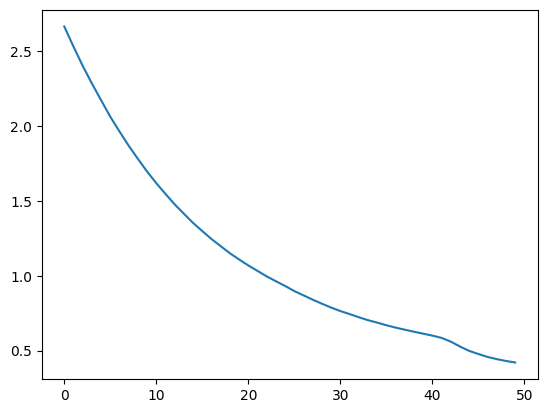

In [74]:
plt.plot(history.history['loss']);

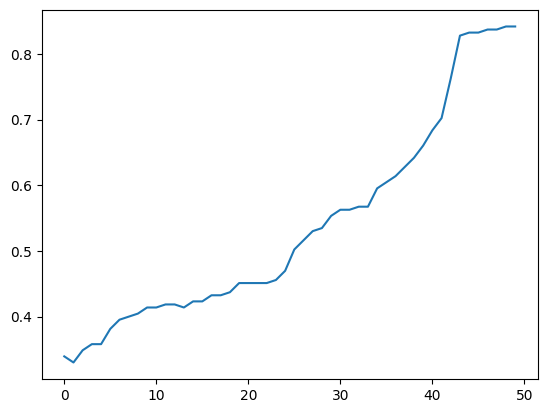

In [75]:
plt.plot(history.history['accuracy']);

In [76]:
X_test.shape

(54, 6)

In [77]:
predictions = network2.predict(X_test)
predictions # 0에 가까우면 Bart, 1에 가까우면 Homer

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


array([[0.25563696],
       [0.5394657 ],
       [0.3666767 ],
       [0.40034005],
       [0.24129991],
       [0.57727975],
       [0.09716605],
       [0.33549318],
       [0.28614327],
       [0.2760336 ],
       [0.3666767 ],
       [0.9421962 ],
       [0.5365698 ],
       [0.17801292],
       [0.40174636],
       [0.91957504],
       [0.42288315],
       [0.73768824],
       [0.40011343],
       [0.3666767 ],
       [0.3666767 ],
       [0.7965741 ],
       [0.81497425],
       [0.18014675],
       [0.10854714],
       [0.8637228 ],
       [0.39275822],
       [0.3666767 ],
       [0.5812258 ],
       [0.8969605 ],
       [0.79071355],
       [0.97359854],
       [0.88427895],
       [0.39456812],
       [0.97176117],
       [0.79828656],
       [0.24003245],
       [0.17925684],
       [0.40111762],
       [0.36725006],
       [0.81028765],
       [0.40216056],
       [0.36440283],
       [0.27958342],
       [0.26857996],
       [0.868583  ],
       [0.52449566],
       [0.397

In [78]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

In [79]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions) # 1번째 접근법보다 좋음
# 이런 특정한 사례 연구에서 특성을 추출하는 것이 이미지의 모든 픽셀을 사용하는 것보다 나음.

0.8888888888888888

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[27,  1],
       [ 5, 21]])

<Axes: >

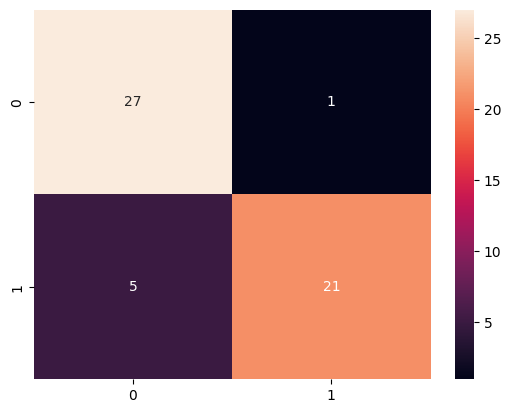

In [82]:
sns.heatmap(cm, annot=True)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        28
           1       0.95      0.81      0.88        26

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



### Saving, loading and classifying one single image

In [84]:
# 신경망 모델 저장
model_json = network2.to_json() # 인터넷에서 아주 일반적인 형식. 신경망 구조를 나타낼 때도 사용.
with open('network2.json', 'w') as json_file:
    json_file.write(model_json)

In [85]:
# 가중치 저장
from keras.models import save_model
network2_saved = save_model(network2, 'weight2.hdf5') # .hdf5 -> 텐서플로로 가중치 저장 시 사용하는 파일 유형
# 1번째 접근법때의 모델보다 메모리 크기가 훨씬 작음. 신경망 구조가 더 간단해졌기 때문.

In [86]:
with open('network2.json', 'r') as json_file:
    json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_1", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 6], "dtype": "float32", "sparse": false, "name": "input_layer_1"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constrai

In [87]:
network2_loaded = tf.keras.models.model_from_json(json_saved_model)
network2_loaded.load_weights('/content/weight2.hdf5')
network2_loaded.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
network2_loaded.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              28 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
test_image = X_test[33]
test_image  # 픽셀이 아닌 특성만 존재

array([0.        , 0.15504173, 0.140367  , 0.        , 0.        ,
       0.        ])

In [90]:
test_image.shape

(6,)

In [91]:
test_image = test_image.reshape(1, -1)
test_image.shape # 1은 하나의 이미지를 뜻함. 5개의 이미지였으면 5

(1, 6)

In [92]:
network2_loaded.predict(test_image)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


array([0.39456815], dtype=float32)

In [93]:
if network2_loaded.predict(test_image)[0][0] < 0.5:
    print('Bart')
else:
    print('Homer')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Bart


In [94]:
y_test[33]

1